# JAL34 exploration

**JAL34 is a protein downregulated in root hairless mutant *cpc try* versus Col-0. This was identified in a proteomics dataset. Root hairless mutants have altered soil adhesion phenotypes and this could also be through changes in exudate composition as well as lack of root hairs themselves.** 

### This notebook is taking a look at the nucleotide sequence of JAL34 and trying to translate it into a protein, checking this against an existing protein sequence for this gene.

First step is to install Biopython, an external module which performs functions useful in analysing bioinformatics data.

In [1]:
pip install Biopython

Note: you may need to restart the kernel to use updated packages.


Next, importing modules and functions within Biopython to analyse a fasta file from NCBI containing the nucleotide sequence of JAL34.

In [2]:
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord

These functions enable the information in a fasta file to be read and the nucleotide sequence to be extracted.

In [3]:
JAL34 = SeqIO.read("At3g16460.fasta", "fasta")
print(JAL34)

ID: AY035108.1
Name: AY035108.1
Description: AY035108.1 Arabidopsis thaliana putative lectin protein (At3g16460) mRNA, complete cds
Number of features: 0
Seq('ACACCTAATCTTCATCTTCATCTTCGCATTCATAGTCTCTACGATCAGATAGAT...AAA')


In [4]:
jal34 = JAL34.seq
print(jal34)

ACACCTAATCTTCATCTTCATCTTCGCATTCATAGTCTCTACGATCAGATAGATAAAAGAAGTCAACAACGATGTCTTGGGACGATGGATCACACGCAAAGGTGAAGAAAGTGCAGCTAACCTTCGATGAGATCATCTACTCAATCCAGGTCACGTACGACGGAGCCACCGCTCTTCAATCCCAGCTTCGCGGCTCCGTTGGTCCCAAATCTGCTGAGTTCACTTTGGCTCCGGACGAGTACATAACGGCCCTTTCTGCTTACGGCAAATCGTTGAGTACGCAAGAAGTTATTACGGCGTTGACTTTCACAACCAACAAGACTTCTTATGGACCTTACGGTACCAAATCCGGTTTCCAGATTTCTGCTCCGGAAGCCACCGGTAAACAGATCTCCGGTTTCCTTGGTACCAGCGGCAATGTTCTCAACACCATCGACGTTCACTATTCTCCCATACCTACTGGAGGAACTGGCACCGGAGGAACTGGCACCGGAACTGGCACCGGAACTGGCACTGGAACTGGCACTGGCACCGGAACTGGCACTGGAACTGGCACTGGAACTGGCACCGGAGGAACTGGCACTGGAACTGGCACCGGTACTGGAGGAACTGGCACTGGAACTGGCACCGGAGGAACTGGCACTGGAACCGGCACTGGGACTGGCACTGGAACCGGCACTGGGACTGGCACTGGAACCGGCACCGGAGGAACTGGCACTGGAACCGGCACCGGAGGAACTGGCACTGGAACCGGCACTGGGACCGGCACTGGGACCGGCACCGGAGGAACTGGCACTGGAACCGGAACTGGTACCGGTTCAGGTGCTCAGAAATTGGAAGCACAAGGCAACAGTACAGGAGGTACATCATGGGACGATGGATCCGATTACGATGGCGTGACCAAGATATACGCAAGCTACGGTGGGGAAGGTATTCAATACGTCAAGTTCGACTATGTGAAAGGTGGAGTAACAAAACAAGGAGTTCTACACGGTAAACA

Counting the number of each nucleotide within the gene seqeuence.

In [5]:
count_DNA = jal34
nucleotides = {}
for n in count_DNA:
    if n in nucleotides:
        nucleotides[n] += 1
    else:
        nucleotides[n] =  1
print(nucleotides)

{'A': 685, 'C': 506, 'T': 595, 'G': 599}


This nucleotide count information can then be placed in a dataframe.

In [6]:
import pandas as pd
n_count = pd.DataFrame(data=nucleotides, index=[0]).T.reset_index()
n_count = n_count.rename(columns={0: 'frequency', 'index': 'nucleotides'})
n_count = n_count.sort_values(by=['frequency'], ascending=True)

The dataframe can then be plotted to see the distribution of nucleotides in the gene sequence. The graph can be viewed and the image saved.

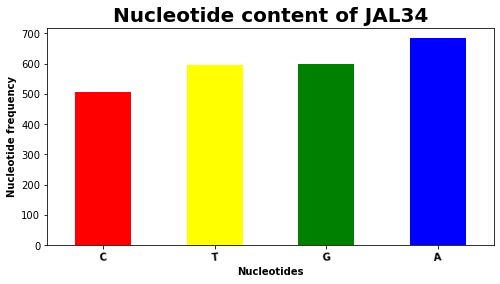

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8,4)) # can change based on desired size of output
a = n_count['frequency'].plot.bar(color= ['red', 'yellow', 'green', 'blue'])
plt.xticks(rotation=5) # needed as axis labels at 90 degree angle otherwise
plt.ylabel("Nucleotide frequency", weight='bold')
r = list(range(len(n_count)))
plt.xticks(r, n_count.nucleotides, weight='bold')
plt.xlabel("Nucleotides", weight='bold')
plt.title("Nucleotide content of JAL34", weight='bold', size=20)
plt.savefig("Nucleotide graph")
plt.show()

The percentage GC content is in important property of nucleic acids. This calculates the percentage GC content of JAL34 and prints the answer.

In [8]:
dna_list = list(jal34)
def GC_content(dna_list): 
    G_count = dna_list.count("G")
    C_count = dna_list.count("C")
    Total_count = len(dna_list)
    GC_sum = int(G_count) + int(C_count)
    Percent_GC = ((GC_sum / Total_count) * 100)
    return Percent_GC

In [9]:
Percent = round(GC_content(dna_list))
print(f'The percentage GC content is {Percent} %')

The percentage GC content is 46 %


Each three nucleotides (codons) encode a single amino acid. There are 20 of these each represented in this dictionary by a single letter code. Stop codons are represented by a "!".

In [10]:
gencode = {
    'ATA':'I', 'ATC':'I', 'ATT':'I', 'ATG':'M',
    'ACA':'T', 'ACC':'T', 'ACG':'T', 'ACT':'T',
    'AAC':'N', 'AAT':'N', 'AAA':'K', 'AAG':'K',
    'AGC':'S', 'AGT':'S', 'AGA':'R', 'AGG':'R',
    'CTA':'L', 'CTC':'L', 'CTG':'L', 'CTT':'L',
    'CCA':'P', 'CCC':'P', 'CCG':'P', 'CCT':'P',
    'CAC':'H', 'CAT':'H', 'CAA':'Q', 'CAG':'Q',
    'CGA':'R', 'CGC':'R', 'CGG':'R', 'CGT':'R',
    'GTA':'V', 'GTC':'V', 'GTG':'V', 'GTT':'V',
    'GCA':'A', 'GCC':'A', 'GCG':'A', 'GCT':'A',
    'GAC':'D', 'GAT':'D', 'GAA':'E', 'GAG':'E',
    'GGA':'G', 'GGC':'G', 'GGG':'G', 'GGT':'G',
    'TCA':'S', 'TCC':'S', 'TCG':'S', 'TCT':'S',
    'TTC':'F', 'TTT':'F', 'TTA':'L', 'TTG':'L',
    'TAC':'Y', 'TAT':'Y', 'TAA':'!', 'TAG':'!',
    'TGC':'C', 'TGT':'C', 'TGA':'!', 'TGG':'W'}

Translate the nucleotide sequence into an amino acid sequence. Translation into protein begins at the start codon, the three bases "ATG" which encode methionine. Translation proceeds in groups of three and  ends at the first stop codon ("TGA", "TAG", "TAA"). 

In [11]:
rna_sequence = jal34
bases = len(rna_sequence)

protein_start = 0 #counter = 0
for b in range(bases):
    if(rna_sequence[b:b+3] == "ATG"): #if "ATG" motif is present, this cuts off the sequence prior and becomes start point
        protein_start = b
        break
protein_sequence = ""
for b in range(protein_start, bases, 3): #range between start codon and the end of the sequence in increments of 3 (i.e. codon)
    AA = gencode[rna_sequence[b:b+3]] #using the dictionary given above for the codon -> amino acids 
    if(AA =="!"): #if the amino acid is a stop then the loop terminates
        break
    else:
        protein_sequence = protein_sequence + AA
print(protein_sequence)

MSWDDGSHAKVKKVQLTFDEIIYSIQVTYDGATALQSQLRGSVGPKSAEFTLAPDEYITALSAYGKSLSTQEVITALTFTTNKTSYGPYGTKSGFQISAPEATGKQISGFLGTSGNVLNTIDVHYSPIPTGGTGTGGTGTGTGTGTGTGTGTGTGTGTGTGTGTGTGGTGTGTGTGTGGTGTGTGTGGTGTGTGTGTGTGTGTGTGTGTGTGGTGTGTGTGGTGTGTGTGTGTGTGTGGTGTGTGTGTGSGAQKLEAQGNSTGGTSWDDGSDYDGVTKIYASYGGEGIQYVKFDYVKGGVTKQGVLHGKQQSRQNPREFVINHPDEYLVSVEGWYETVMLGIQFKTNLNTYEVSIYPFEPSTDTKFTLQVQDKKIIGFHGFAGNHVNSIGAYFVPKSSTTPVPSTPLKLTAEGGETGAVWDDGSHDDVKKVYVGQGQDGVAAVKFEYKNGSQVVFGDERGTRTLLGFEEFELESDEYITSVEGYYEKNFGVDTVVTTLIFKTSKNKTAGPFGIVSGTKFEFKKEGYKITGFHGRAGEYVNAIGAYLAPSGTTPLTPATQSQKLEGAGSEAGTLWDDGAFDGVRKVSVGQAQDGIGAVSFVYDKAGQVVEGKEHGKPTLLGFEEFELDYPSEYITAVDGTYDAIFGNEPIVNMLRFTTNKRVSIPFGIGAGTAFEFKKDGQKIVGFHGRAGDLLHKFGVHVAPITK


Can check how well this translated the nucleotide sequence into protein by doing a pairwise comparison between an available protein sequence for the JAL34 gene (available on UniProt) and the one just produced.

In [12]:
from Bio import pairwise2
seqjal = SeqIO.read("O04310.fasta", "fasta") # File downloaded from UniProt https://www.uniprot.org/uniprot/O04310.fasta
newseq = protein_sequence
alignment = pairwise2.align.globalxx(seqjal.seq, newseq) #.seq needed for the original as it is in fasta format, the other is just a list

In [13]:
print(pairwise2.format_alignment(*alignment[0]))

MSWDDGSHAKVKKVQLTFDEIIYSIQVTYDGATALQSQLRGSVGPKSAEFTLAPDEYITALSAYGKSLSTQEVITALTFTTNKTSYGPYGTKSGFQISAPEATGKQISGFLGTSGNVLNTIDVHYSPIPTGGTGTGGTGTGTGTGTGTGTGTGTGTGTGTGTGTGTGGTGTGTGTGTGGTGTGTGTGGTGTGTGTGTGTGTGTGTGTGTGTGGTGTGTGTGGTGTGTGTGTGTGTGTGGTGTGTGTGTGSGAQKLEAQGNSTGGTSWDDGSDYDGVTKIYASYGGEGIQYVKFDYVKGGVTKQGVLHGKQQSRQNPREFVINHPDEYLVSVEGWYETVMLGIQFKTNLNTYEVSIYPFEPSTDTKFTLQVQDKKIIGFHGFAGNHVNSIGAYFVPKSSTTPVPSTPLKLTAEGGETGAVWDDGSHDDVKKVYVGQGQDGVAAVKFEYKNGSQVVFGDERGTRTLLGFEEFELESDEYITSVEGYYEKNFGVDTVVTTLIFKTSKNKTAGPFGIVSGTKFEFKKEGYKITGFHGRAGEYVNAIGAYLAPSGTTPLTPATQSQKLEGAGSEAGTLWDDGAFDGVRKVSVGQAQDGIGAVSFVYDKAGQVVEGKEHGKPTLLGFEEFELDYPSEYITAVDGTYDAIFGNEPIVNMLRFTTNKRVSIPFGIGAGTAFEFKKDGQKIVGFHGRAGDLLHKFGVHVAPITK
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

This shows an exact alignment between the two sequences, demonstrating the translation code works for generating protein sequences from a nucleotide sequence.